# SKIN CANCER DETECTION

# Loading Dataset

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense , Conv2D, MaxPool2D , Flatten , Dropout
import keras
import os

In [2]:
file_csv ="D:\\Downloads\\dataset\\data\\HAM10000_metadata.csv"
imgs_path = "D:\\Downloads\\dataset\\data\\Skin Cancer\\Skin Cancer"

In [4]:
df = pd.read_csv(file_csv)

In [5]:
df.drop(['lesion_id','dx_type','age','sex','localization'],axis = 1,inplace = True)
df.head(5)

,image_id,dx
0,ISIC_0027419,bkl
1,ISIC_0025030,bkl
2,ISIC_0026769,bkl
3,ISIC_0025661,bkl
4,ISIC_0031633,bkl


In [6]:
dir = imgs_path
id = [x.split('.')[0] for x in os.listdir(dir)]
image_path = {x:os.path.join(dir,f'{x}.jpg') for x in id}

In [7]:
len(image_path)

10015

In [8]:
df['path'] = df.image_id.map(image_path.get)
df.head()

,image_id,dx,path
0,ISIC_0027419,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...
1,ISIC_0025030,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...
2,ISIC_0026769,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...
3,ISIC_0025661,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...
4,ISIC_0031633,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...


In [9]:
le = LabelEncoder()
df['label'] = le.fit_transform(df.dx)
df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [10]:
df.head(5)

,image_id,dx,path,label
0,ISIC_0027419,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,2
1,ISIC_0025030,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,2
2,ISIC_0026769,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,2
3,ISIC_0025661,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,2
4,ISIC_0031633,bkl,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,2


In [11]:
label = {0:'Actinic Keratoses',1:'basal',2:'benign',3:'dermatofibroma',4:'melanoma',5:'melanocytic nevi',6:'vascular lesions'}
df['label'].replace(label, inplace=True)

In [12]:
le = LabelEncoder()
df['dx'] = le.fit_transform(df.dx)

In [13]:
df.head(5)

,image_id,dx,path,label
0,ISIC_0027419,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign
1,ISIC_0025030,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign
2,ISIC_0026769,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign
3,ISIC_0025661,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign
4,ISIC_0031633,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign


# Data Visualization

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'melanocytic nevi'),
  Text(1, 0, 'melanoma'),
  Text(2, 0, 'benign'),
  Text(3, 0, 'basal'),
  Text(4, 0, 'Actinic Keratoses'),
  Text(5, 0, 'vascular lesions'),
  Text(6, 0, 'dermatofibroma')])

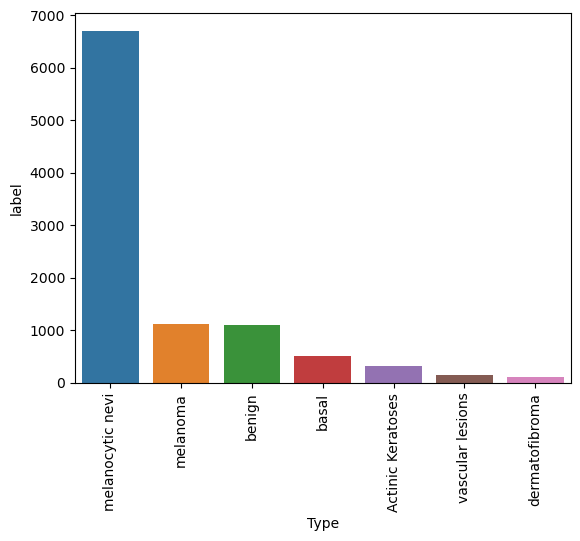

In [14]:
#plotting bar graph of data to measure the count of images
counts = df.label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [15]:
import cv2
images = []
paths=df['path']
for i in np.arange(len(paths)):
    images.append(cv2.cvtColor(plt.imread(paths[i]),cv2.COLOR_BGR2GRAY))

np.array(images).shape

(10015, 450, 600)

In [16]:
from PIL import Image

In [17]:
# Adding image pixels
df['image_pixel'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((28,28))))

In [18]:
df.head()

,image_id,dx,path,label,image_pixel
0,ISIC_0027419,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign,"[[[192, 153, 193], [195, 155, 192], [197, 154,..."
1,ISIC_0025030,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign,"[[[27, 16, 32], [69, 49, 76], [122, 93, 126], ..."
2,ISIC_0026769,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign,"[[[192, 138, 153], [200, 144, 162], [202, 142,..."
3,ISIC_0025661,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign,"[[[40, 21, 31], [95, 61, 73], [143, 102, 118],..."
4,ISIC_0031633,2,D:\Downloads\dataset\data\Skin Cancer\Skin Can...,benign,"[[[159, 114, 140], [194, 144, 173], [215, 162,..."


In [19]:
img_pix = df['image_pixel']

In [20]:
img_pix

0        [[[192, 153, 193], [195, 155, 192], [197, 154,...
1        [[[27, 16, 32], [69, 49, 76], [122, 93, 126], ...
2        [[[192, 138, 153], [200, 144, 162], [202, 142,...
3        [[[40, 21, 31], [95, 61, 73], [143, 102, 118],...
4        [[[159, 114, 140], [194, 144, 173], [215, 162,...
                               ...                        
10010    [[[183, 166, 182], [183, 165, 181], [184, 167,...
10011    [[[3, 4, 2], [41, 36, 35], [119, 103, 102], [1...
10012    [[[134, 120, 120], [166, 148, 149], [175, 155,...
10013    [[[160, 124, 145], [164, 131, 151], [166, 127,...
10014    [[[175, 142, 121], [180, 149, 133], [181, 149,...
Name: image_pixel, Length: 10015, dtype: object

In [21]:
img_pix.shape

(10015,)

In [22]:
image_array = np.array(img_pix.tolist())

In [23]:
image_array.shape

(10015, 28, 28, 3)

In [24]:
image_array

array([[[[192, 153, 193],
         [195, 155, 192],
         [197, 154, 185],
         ...,
         [193, 145, 154],
         [197, 154, 163],
         [194, 152, 160]],

        [[197, 162, 201],
         [200, 160, 196],
         [201, 160, 192],
         ...,
         [194, 147, 150],
         [198, 157, 166],
         [193, 153, 168]],

        [[197, 155, 192],
         [198, 154, 185],
         [202, 157, 191],
         ...,
         [194, 149, 153],
         [198, 159, 175],
         [194, 156, 175]],

        ...,

        [[194, 158, 192],
         [205, 171, 205],
         [205, 165, 191],
         ...,
         [190, 153, 180],
         [193, 159, 187],
         [193, 162, 196]],

        [[187, 154, 185],
         [202, 170, 198],
         [201, 161, 183],
         ...,
         [178, 132, 149],
         [187, 151, 174],
         [190, 159, 189]],

        [[172, 137, 166],
         [191, 153, 179],
         [196, 154, 175],
         ...,
         [174, 125, 139],
        

In [25]:
image_array.shape

(10015, 28, 28, 3)

In [26]:
img_label = df['dx']

In [27]:
image_pixels_2d = image_array.reshape(image_array.shape[0], -1)

# Sampling

In [28]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
df_x,df_y = ros.fit_resample(image_pixels_2d, img_label)

In [29]:
df_x= np.array(df_x).reshape(-1,28,28,3)

In [30]:
df_x.shape

(46935, 28, 28, 3)

In [31]:
train=df_x
test=df_y

## Train, Test Split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_x,df_y, test_size=0.2, random_state=1)

In [58]:
np_x_train = np.array(X_train)
np_x_test = np.array(X_test)

In [34]:
X_train = np.array(np_x_train).reshape(-1,28, 28,3)
X_test = np.array(np_x_test).reshape(-1,28, 28,3)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [35]:
print("training",X_train.shape)
print(Y_train.shape)
print("testing",X_test.shape)
print(Y_test.shape)

training (37548, 28, 28, 3)
(37548,)
testing (9387, 28, 28, 3)
(9387,)


## Train, Validation Data Split

In [36]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train,Y_train, test_size=0.1, random_state=1)

## Augmentaion

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images using the ImageDataGenerator
train_images = datagen.flow(X_train, Y_train, batch_size=64,)


In [38]:
datagen2 = ImageDataGenerator()

In [39]:
text_images = datagen2.flow(X_test, Y_test, batch_size=64,)

In [40]:
valid_images = datagen2.flow(X_valid, Y_valid, batch_size=64,)

# Building model

In [41]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [42]:

optimizer = tf.keras.optimizers.Adam()

In [43]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [46]:
history = model.fit(train_images, epochs=70, validation_data=valid_images  )


Epoch 1/70
529/529 [==============================] - 81s 149ms/step - loss: 1.8868 - accuracy: 0.3576 - val_loss: 1.3045 - val_accuracy: 0.4796
Epoch 2/70
529/529 [==============================] - 84s 158ms/step - loss: 1.2049 - accuracy: 0.5316 - val_loss: 1.0207 - val_accuracy: 0.6101
Epoch 3/70
529/529 [==============================] - 81s 153ms/step - loss: 1.0293 - accuracy: 0.6051 - val_loss: 0.9749 - val_accuracy: 0.6165
Epoch 4/70
529/529 [==============================] - 79s 149ms/step - loss: 1.0237 - accuracy: 0.6076 - val_loss: 0.8760 - val_accuracy: 0.6485
Epoch 5/70
529/529 [==============================] - 79s 149ms/step - loss: 0.8678 - accuracy: 0.6697 - val_loss: 1.2115 - val_accuracy: 0.5795
Epoch 6/70
529/529 [==============================] - 61s 116ms/step - loss: 0.8398 - accuracy: 0.6789 - val_loss: 0.7359 - val_accuracy: 0.7116
Epoch 7/70
529/529 [==============================] - 62s 118ms/step - loss: 0.7517 - accuracy: 0.7075 - val_loss: 0.6913 - val_ac

529/529 [==============================] - 32s 61ms/step - loss: 0.2387 - accuracy: 0.9127 - val_loss: 0.2152 - val_accuracy: 0.9190
Epoch 58/70
529/529 [==============================] - 31s 59ms/step - loss: 0.2387 - accuracy: 0.9130 - val_loss: 0.2249 - val_accuracy: 0.9172
Epoch 59/70
529/529 [==============================] - 35s 66ms/step - loss: 0.2503 - accuracy: 0.9087 - val_loss: 0.2276 - val_accuracy: 0.9166
Epoch 60/70
529/529 [==============================] - 32s 60ms/step - loss: 0.2450 - accuracy: 0.9077 - val_loss: 0.2019 - val_accuracy: 0.9193
Epoch 61/70
529/529 [==============================] - 33s 63ms/step - loss: 0.2384 - accuracy: 0.9136 - val_loss: 0.2121 - val_accuracy: 0.9209
Epoch 62/70
529/529 [==============================] - 31s 58ms/step - loss: 0.2504 - accuracy: 0.9092 - val_loss: 0.2569 - val_accuracy: 0.9121
Epoch 63/70
529/529 [==============================] - 32s 60ms/step - loss: 0.2328 - accuracy: 0.9150 - val_loss: 0.1880 - val_accuracy: 0.93

# Model Evaluation

In [47]:
model.evaluate(text_images)

147/147 [==============================] - 2s 16ms/step - loss: 0.1915 - accuracy: 0.9336


[0.19146865606307983, 0.9336315989494324]

In [48]:
  model.save('skin_1_model.h5')

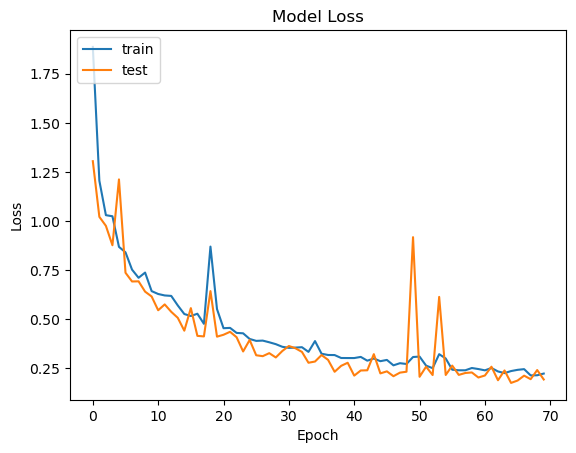

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

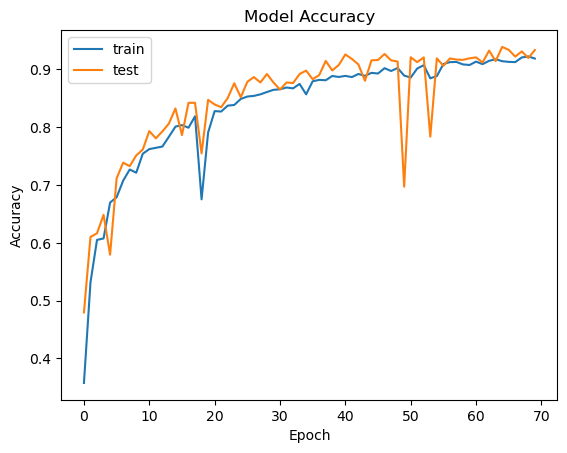

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()